In [ ]:
# Installing necessary packages
!pip install sunpy aiapy opencv-python scikit-image sunkit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.8/378.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 41.2 MB/s eta 0:00:00
  Created wheel 

In [ ]:
import numpy as np #for these steps refer to page 76 of nius note
import sunpy
import sunpy.map
import aiapy
import sunpy.sun
from astropy.io import fits
import cv2
from sunpy.coordinates import get_body_heliographic_stonyhurst
from sunpy.data.sample import AIA_193_JUN2012
import matplotlib.pyplot as plt
from aiapy.calibrate import register, update_pointing
from aiapy.calibrate.util import get_pointing_table
#from aiapy.calibrate import normalize_exposure, register, update_pointing

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

AIA20120601_000007_0193_lowres.fits:   0%|          | 0.00/996k [00:00<?, ?B/s]

In [ ]:
sample_data=AIA_193_JUN2012
dir(sample_data)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_hash',
 '_lines',
 '_lines_cached',
 '_load_parts',
 '_make_child_relpath',
 '_parse_path',
 '_parts_normcase',
 '_parts_normcase_cached',
 '_raw_paths',
 '_root',
 '_scandir',
 '_str',
 '_str_normcase',
 '_str_normcase_cached',
 '_tail',
 '_tail_cached',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'hardlink_to',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir'

In [ ]:
sample_data

PosixPath('/root/.local/share/sunpy/AIA20120601_000007_0193_lowres.fits')

In [ ]:
sample_data.name

'AIA20120601_000007_0193_lowres.fits'

<sunpy.map.sources.sdo.AIAMap object at 0x7fb594893950>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 2
Detector:		 AIA
Measurement:		 193.0 Angstrom
Wavelength:		 193.0 Angstrom
Observation Date:	 2012-06-01 00:00:07
Exposure Time:		 1.999822 s
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [2.403032 2.403032] arcsec / pix
Reference Pixel:	 [512.05249025 510.0174865 ] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-0.26208947, -0.52417895,  0.        , ...,  0.26208948,
         0.        ,  0.72074606],
       [ 0.26208947, -0.98283553,  0.26208947, ...,  0.        ,
         0.26208947, -1.24492501],
       [-0.26208947, -0.52417895, -0.52417895, ...,  0.        ,
        -0.98283553,  0.26208948],
       ...,
       [-1.993554  ,  0.4983885 , -0.24919425, ...,  0.        ,
         0.996777  ,  0.24919425],
       [ 0.        ,  0.75658712,  0.28372017, ...,  0.75658712,
        -0.47286695, -1.0403073 ],
       [ 0.52961099, -0.52961099, -0.22697614, ...,  0.98356326,
         0.        ,  0.52961099]])
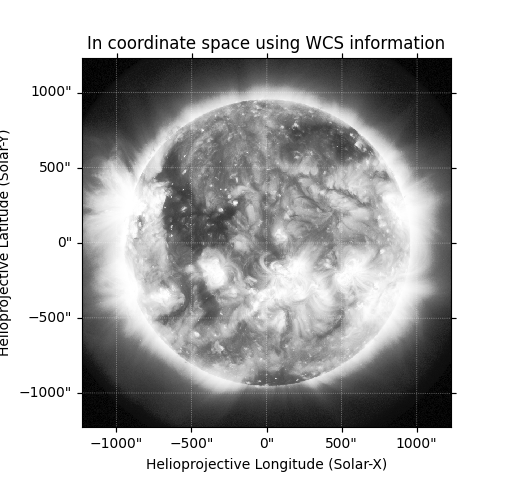
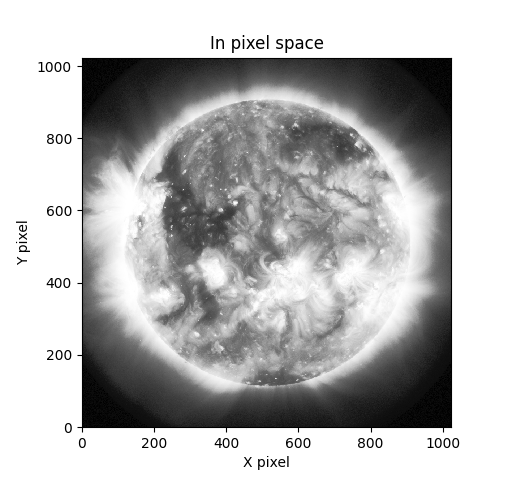
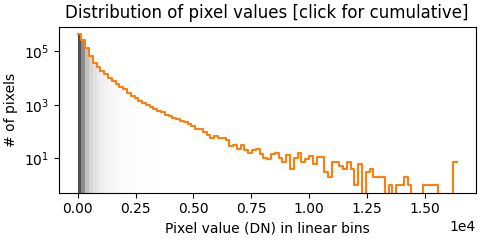
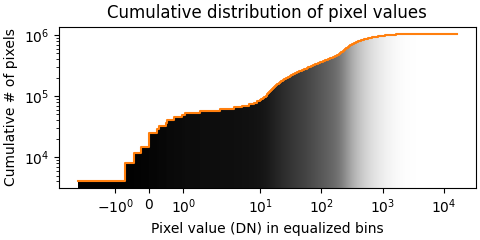

In [ ]:
m = sunpy.map.Map(AIA_193_JUN2012)
m

In [ ]:
m_registered = register(m) #this is a package that fixes the reference px of the sun, that is, the centre of the sun to the centre of sthe ccd, the op gives a rotn matrix, it helps to fix the solar north with the north of the image

In [ ]:
print(m_registered.scale)
print(m_registered.rotation_matrix)

SpatialPair(axis1=<Quantity 2.4 arcsec / pix>, axis2=<Quantity 2.4 arcsec / pix>)
[[ 1.00000000e+00  2.89776905e-19]
 [-1.41721689e-19  1.00000000e+00]]


<sunpy.map.sources.sdo.AIAMap object at 0x7fb590bd4bf0>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 2
Detector:		 AIA
Measurement:		 193.0 Angstrom
Wavelength:		 193.0 Angstrom
Observation Date:	 2012-06-01 00:00:07
Exposure Time:		 1.999822 s
Dimension:		 [1024. 1024.] pix
Coordinate System:	 helioprojective
Scale:			 [2.4 2.4] arcsec / pix
Reference Pixel:	 [511.5 511.5] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-0.93440546, -0.9234591 , -0.41462704, ..., -2.2925871 ,
        -2.2925871 , -2.2925871 ],
       [-0.36571059,  0.00955615,  0.67357976, ..., -0.30581961,
        -0.79969033, -0.31598894],
       [-0.59913632, -0.78018897,  0.29137736, ...,  0.34739199,
         0.42739415,  0.29388689],
       ...,
       [ 0.24750983,  0.24304074, -1.30301818, ...,  0.17108995,
         1.05095318, -0.59397625],
       [-0.13870368, -0.12532319, -0.85124665, ...,  0.05240469,
         1.12230149, -0.82408508],
       [ 0.32531464, -0.48029103, -0.58781306, ...,  0.05299838,
         1.45390106, -0.52225156]])
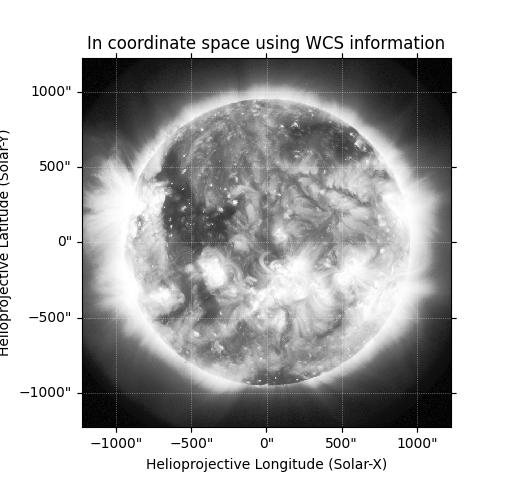
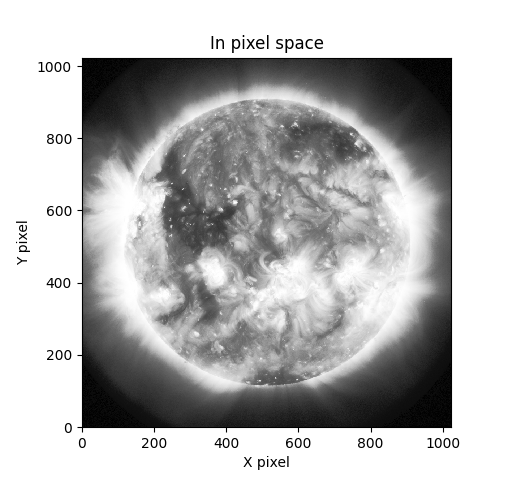
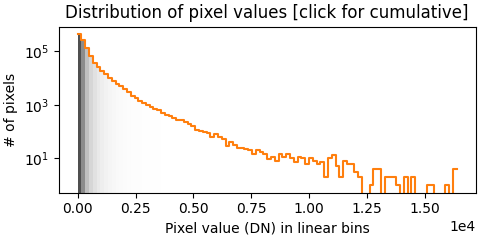
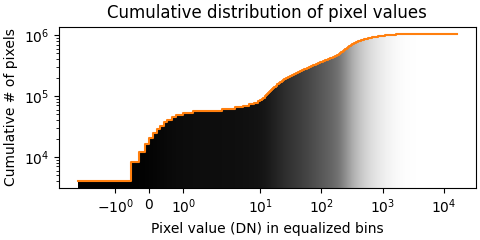

In [ ]:
m_registered #now the op shows that the image has been centred hat you can see from the scale and reference px value

In [ ]:
dir(m)

['__abstractmethods__',
 '__add__',
 '__array_ufunc__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_abc_impl',
 '_as_mpl_axes',
 '_base_name',
 '_check_axes',
 '_coordinate_frame_name',
 '_data',
 '_date_obs',
 '_default_carrington_longitude',
 '_default_dsun',
 '_default_heliographic_latitude',
 '_default_heliographic_longitude',
 '_default_observer_coordinate',
 '_default_time',
 '_get_cmap_name',
 '_get_date',
 '_get_lon_lat',
 '_mask',
 '_meta',
 '_meta_hash',
 '_new_instance',
 '_new_instance_from_op',
 '_ni

In [ ]:
print(m.date)
print(m.detector)
print(m.dimensions)

2012-06-01T00:00:07.840
AIA
PixelPair(x=<Quantity 1024. pix>, y=<Quantity 1024. pix>)


In [ ]:
im171=m_registered.data #this gives 2d data, that is 2d array
print(im171.shape)

(1024, 1024)


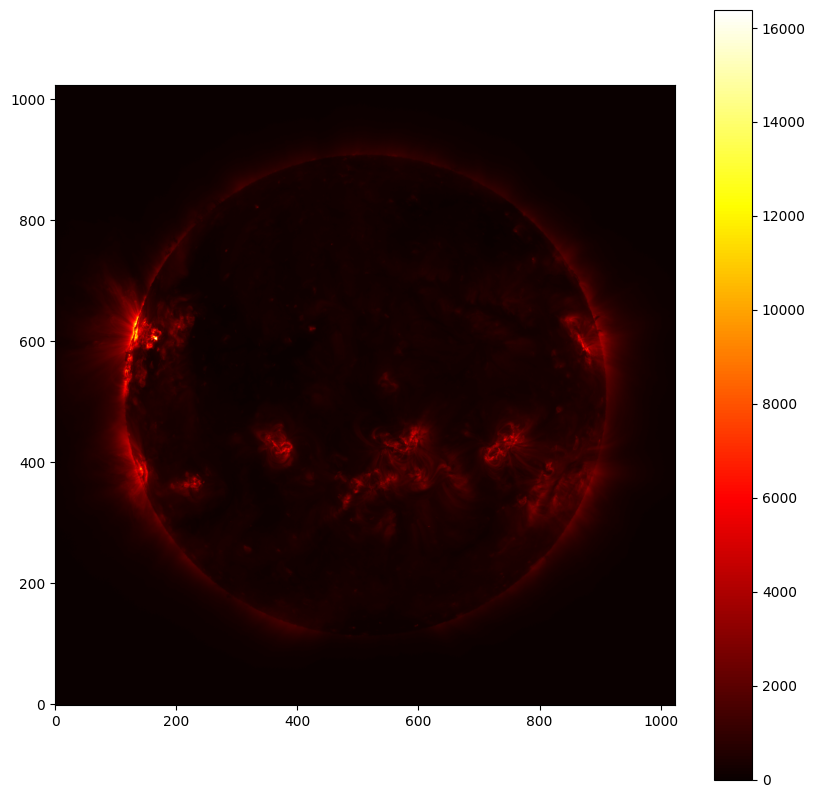

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im171,cmap='hot',origin='lower')
plt.colorbar()
plt.show()

# Zooming into image

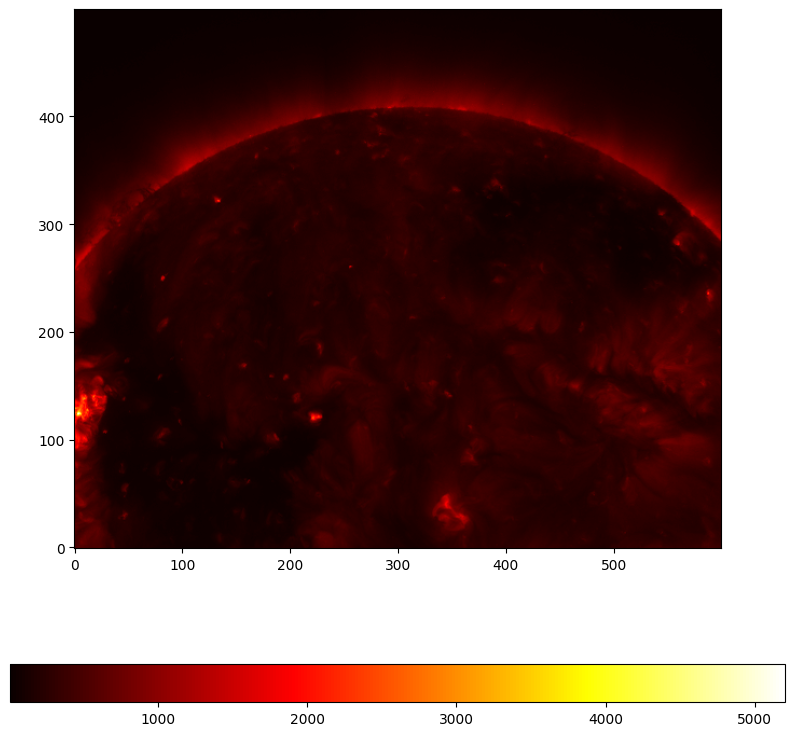

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im171[500:1000,200:800],cmap='hot',origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()

# Image thresholding

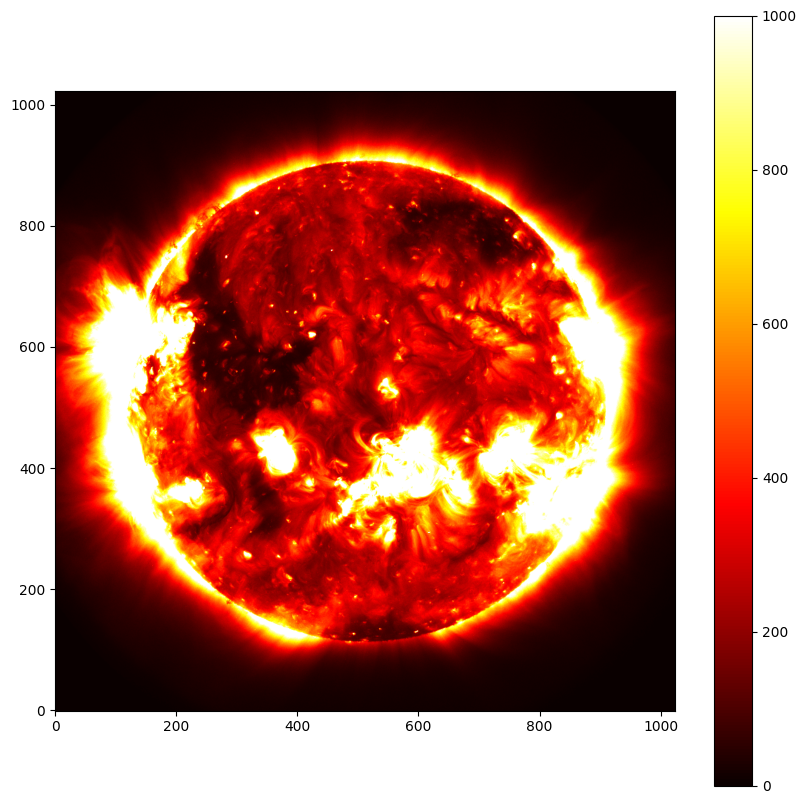

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im171,cmap='hot',origin='lower',vmin=0,vmax=1000) #it will set where the minima and maxima is
plt.colorbar()
plt.show()

# Gamma transformation

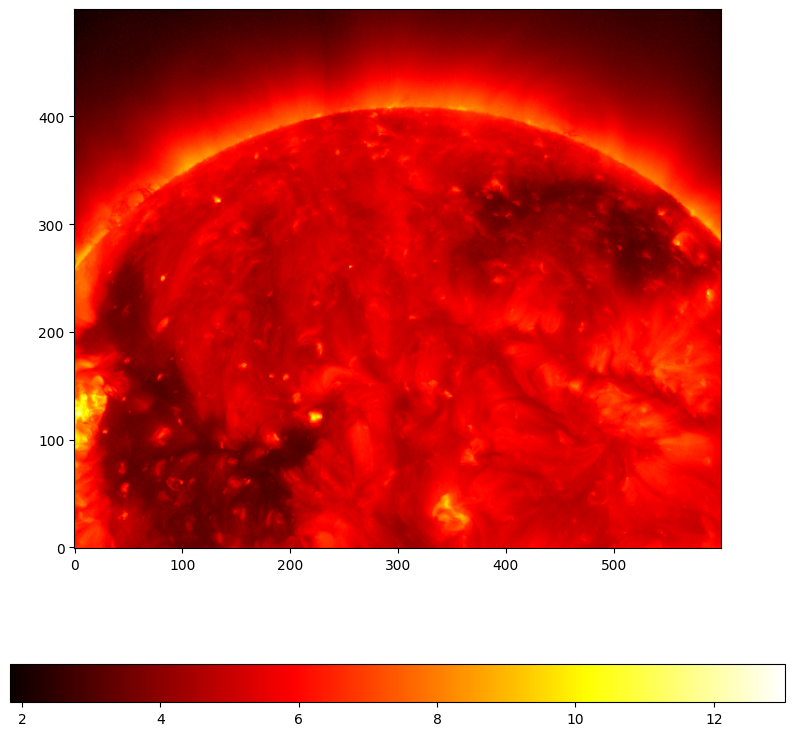

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im171[500:1000,200:800]**0.3,cmap='hot',origin='lower') #if gamma is >1 then it shows the bright features but darkening the image
plt.colorbar(orientation='horizontal')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(im171[500:1000,200:800]**0.002,cmap='hot',origin='lower') #if gamma is >1 then it shows the bright features but darkening the image
plt.colorbar(orientation='horizontal')
plt.show()


# Edge detection

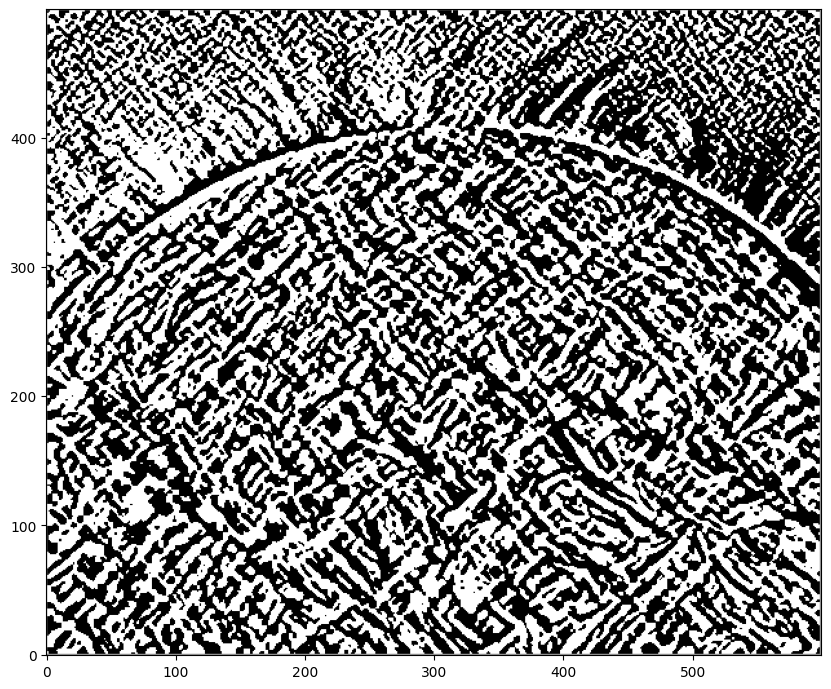

In [ ]:
sobel_im = cv2.Sobel(src=im171[500:1000,200:800], ddepth=cv2.CV_64F, dx=1, dy=1, ksize=13) #here the sobel op is used, which is the edge operator, change in intensity = edge
plt.figure(figsize=(10,10)) #this op uses convolution that fog which checks for the area of te overlap
plt.imshow(sobel_im,cmap='Greys',origin='lower',vmin=-300,vmax=300)


# Unsharp Masking

In [ ]:
from skimage.filters import unsharp_mask

In [ ]:
a=im171[500:1000,200:800]
sharp_im = unsharp_mask(a, radius=3, amount=2,preserve_range=True) #highlighting the features of sharp edges amount gives how much you want to

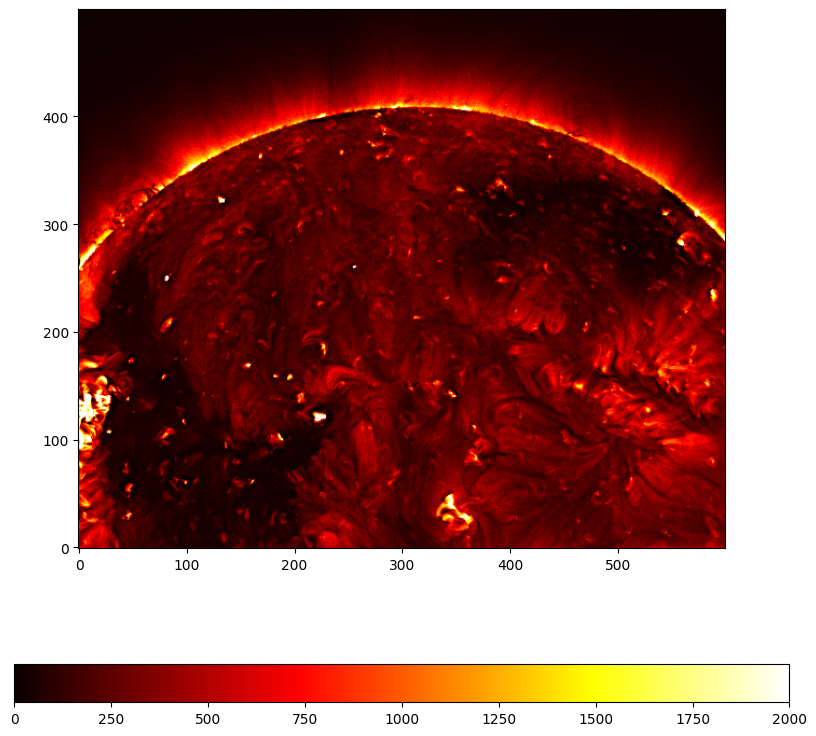

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(sharp_im,cmap='hot',origin='lower',vmin=0,vmax=2000)
#plt.imshow(sharp_im-a,cmap='Greys',origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()

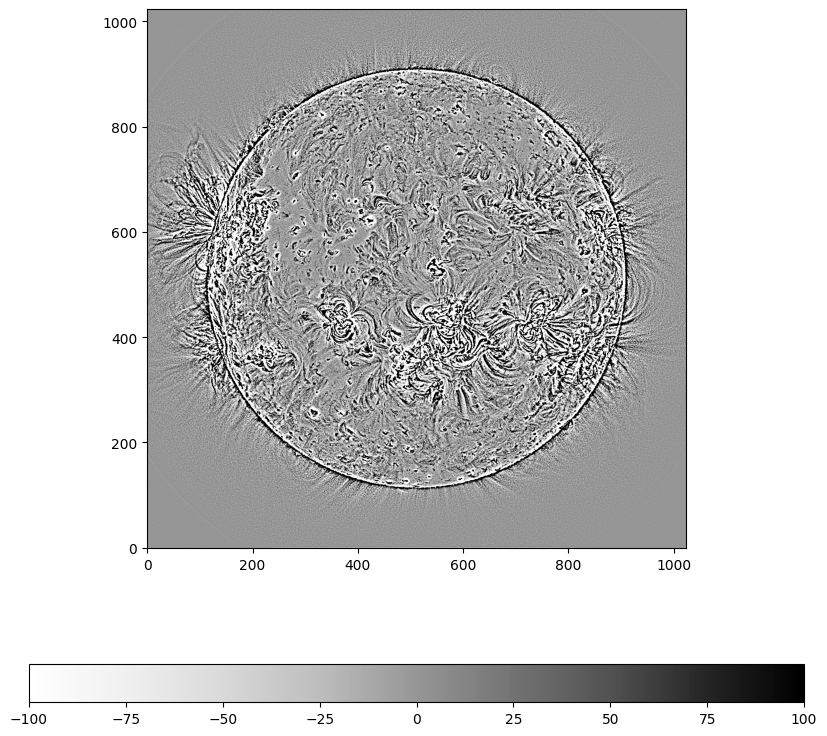

In [ ]:
#im171=cv2.GaussianBlur(im171,(1,1),2)
im_blurred = cv2.GaussianBlur(im171,(5,5),2)
im_blurred2=cv2.GaussianBlur(im171,(11,11),2)
im_blurred3=cv2.GaussianBlur(im171,(17,17),2)
im_blurred4=cv2.GaussianBlur(im171,(41,41),2)
hf_im1=im171-im_blurred
hf_im2=im171-im_blurred2
hf_im3=im171-im_blurred3
hf_im4=im171-im_blurred4
hf_im=hf_im1+hf_im2+hf_im3+hf_im4   #high frequency image. MultiGaussian filtered
plt.figure(figsize=(10,10))
#plt.imshow(hf_im[500:1000,200:800],cmap='hot',origin='lower',vmin=-100,vmax=100)
plt.imshow(hf_im,cmap='Greys',origin='lower',vmin=-100,vmax=100)
plt.colorbar(orientation='horizontal')
plt.show()

In [ ]:
from sunkit_image.enhance import mgn

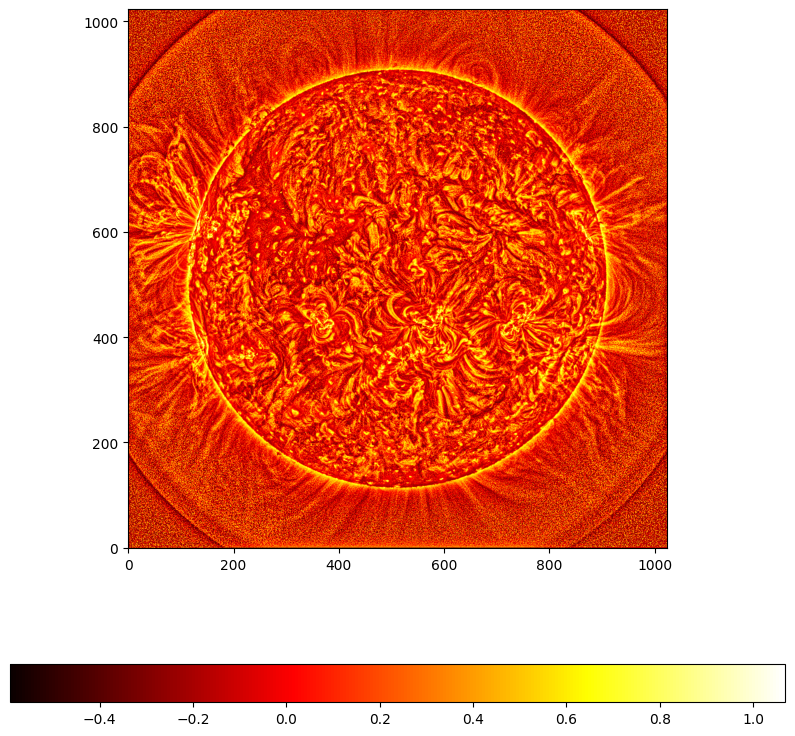

In [ ]:
mgn_map = mgn(im171, sigma=[2, 5, 10], k=0.7, gamma=3., h=0.5)
plt.figure(figsize=(10,10))
plt.imshow(mgn_map, cmap='hot', origin='lower')
plt.colorbar(orientation='horizontal')
plt.show()